In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

file_name = next(iter(uploaded))

df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=";")

print(df.head())

print(df.columns)

Saving 3.csv to 3 (4).csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


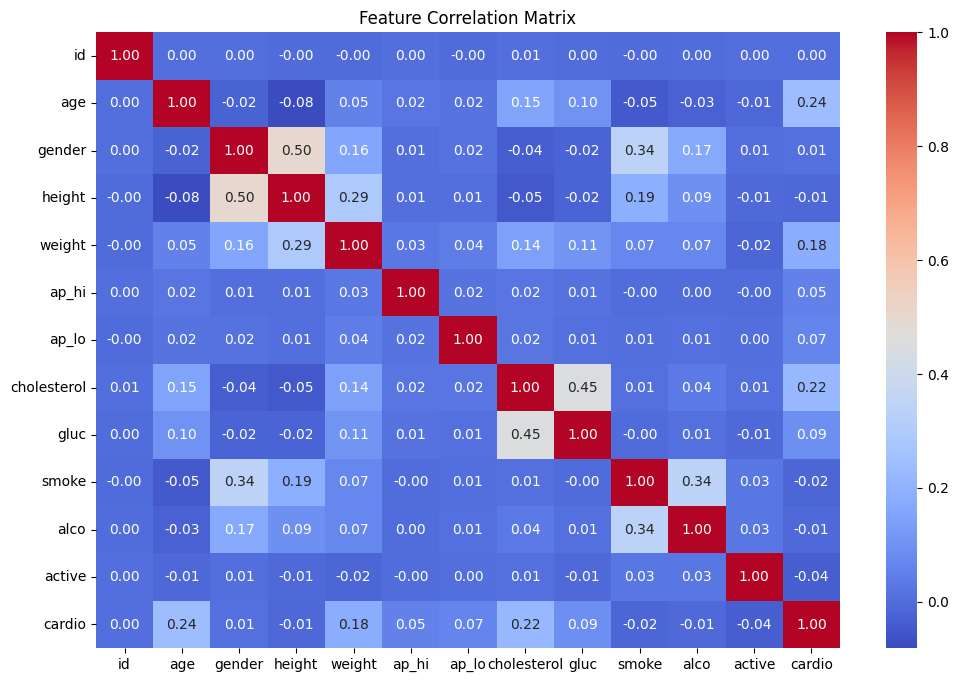

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
X = df.select_dtypes(include=[np.number])  # Select only numeric columns
y = X.iloc[:, -1]  # Last column as target
X = X.iloc[:, :-1]  # All columns except last as features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((56000, 12), (14000, 12))

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(70000, 12)
(56000, 12)
(14000, 12)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import files
import io

# Upload and load dataset
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=";")

# Split features (X) and target (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Imputation and Scaling
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_test = scaler.transform(imputer.transform(X_test))

# Sample the training data (10% of original)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]

# Train and evaluate models
for name, model in models:
    model.fit(X_train_sample, y_train_sample)  # Train on 10% sample
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



Saving 3.csv to 3 (5).csv

Logistic Regression Accuracy: 0.7251
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6988
           1       0.74      0.69      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000


SVM Accuracy: 0.6956
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000


KNN Accuracy: 0.6089
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      6988
           1       0.61      0.60      0.61      7012

    accuracy                           0.61     14000
   macro avg       0

In [ ]:
# Debug inside model loop
model_performance = {}
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Verify predictions
    print(f"Sample predictions for {name}: {y_pred[:10]}")

    model_performance[name] = accuracy

print("Final model performance:", model_performance)


Training Logistic Regression...
Logistic Regression Accuracy: 0.7251
Sample predictions for Logistic Regression: [1 1 1 1 0 0 0 0 1 1]
Training SVM...
SVM Accuracy: 0.6956
Sample predictions for SVM: [1 1 1 1 0 0 0 1 1 1]
Training KNN...
KNN Accuracy: 0.6089
Sample predictions for KNN: [1 1 1 1 0 0 0 1 1 1]
Training Decision Tree...
Decision Tree Accuracy: 0.6326
Sample predictions for Decision Tree: [1 1 1 0 0 1 0 1 1 1]
Training Random Forest...
Random Forest Accuracy: 0.7224
Sample predictions for Random Forest: [1 1 1 0 0 1 0 0 1 1]
Final model performance: {'Logistic Regression': 0.7251428571428571, 'SVM': 0.6955714285714286, 'KNN': 0.6089285714285714, 'Decision Tree': 0.6326428571428572, 'Random Forest': 0.7224285714285714}


<ipython-input-44-7f9ee68eb79a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")


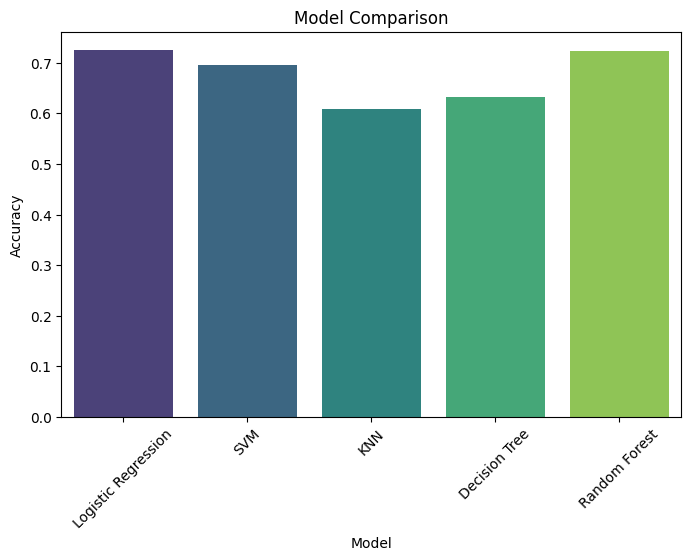

In [ ]:
if model_performance:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Model Comparison")
    plt.xticks(rotation=45)  # Improve readability
    plt.show()
else:
    print("Error: No valid model performance data found.")

In [ ]:
import joblib

best_model_name = max(model_performance, key=model_performance.get)
best_model = next(model for name, model in models if name == best_model_name)

joblib.dump(best_model, "best_heart_disease_model.pkl")
print(f"Best Model ({best_model_name}) saved as 'best_heart_disease_model.pkl'")


Best Model (Logistic Regression) saved as 'best_heart_disease_model.pkl'
